In [1]:
import pandas as pd
arquivo=pd.ExcelFile('dados-regressao.xlsx')
dados = pd.read_excel(arquivo,'RNLS-6')
xobs = dados['Xobs']
yobs = dados['Yobs']


In [2]:
import matplotlib.pyplot as plt
plt.scatter(xobs,yobs)

In [3]:
#montando o modelo
def exponencial(x,a,b):
    return a+b**x

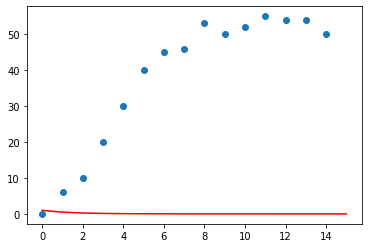

In [4]:
import numpy as np
#grafico previo
a=0
b=0.5
#gerando 100 numeros de 0 a 15
xgraf = np.linspace(0,15,100)

plt.scatter(xobs,yobs)

yest = exponencial(xgraf,a,b)

plt.plot(xgraf,yest,'r-')

In [5]:
def box(x,a,b):
    return a*(1-np.exp(-b*x))

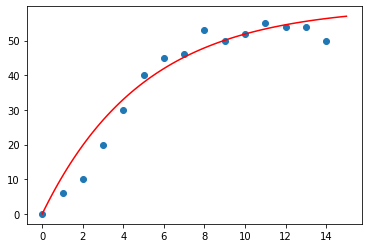

In [6]:
import numpy as np
#grafico previo
a=60
b=0.2
#gerando 100 numeros de 0 a 15
xgraf = np.linspace(0,15,100)

plt.scatter(xobs,yobs)

yest = box(xgraf,a,b)

plt.plot(xgraf,yest,'r-')

In [7]:
from scipy.optimize import curve_fit

valoresiniciais=[60,.2]

parametrosajustados, covar=curve_fit(box,xobs,yobs,p0=valoresiniciais)
parametrosajustados

array([61.6494267 ,  0.17843031])

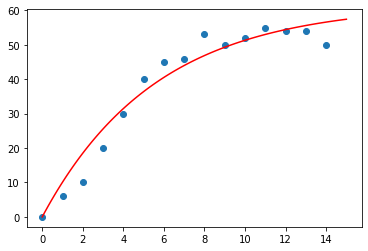

In [8]:
#grafico do modelo ajustado

plt.scatter(xobs,yobs)

a_ajustado=parametrosajustados[0]
b_ajustado=parametrosajustados[1]

yest = box(xgraf,a_ajustado,b_ajustado)

plt.plot(xgraf,yest,'r-')

In [9]:
from lmfit import Model

from numpy import exp, linspace, random

#criando um objeto no lmfit

modelofinal = Model(box)

parametros = modelofinal.make_params(a=60,b=0.1)

resultado = modelofinal.fit(yobs,parametros,x=xobs)

print(resultado.fit_report())

[[Model]]
    Model(box)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 15
    # variables        = 2
    chi-square         = 247.892465
    reduced chi-square = 19.0686512
    Akaike info crit   = 46.0741726
    Bayesian info crit = 47.4902730
[[Variables]]
    a:  61.6493632 +/- 4.62104040 (7.50%) (init = 60)
    b:  0.17843077 +/- 0.03150968 (17.66%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.933


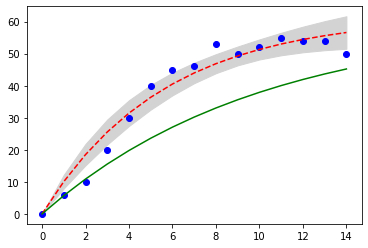

In [10]:
plt.plot(xobs,yobs,'bo')

plt.plot(xobs,resultado.best_fit,'r--')
plt.plot(xobs,resultado.init_fit,'g')

dp = resultado.eval_uncertainty(sigma=2)

plt.fill_between(xobs,resultado.best_fit-dp,resultado.best_fit+dp, color='lightgray')

In [14]:
def logistico (x,ymax,ymin,xo,p):
    return ymax+((ymin-ymax)/((1+((x/xo)**p))))

In [15]:
#Fazendo estatisticas a partir da biblioteca lmfit, baseado no scipy, com respostas mais completas e mais opções
#o pacote precisa ser instalado
from lmfit import Model

# cadastrando o modelo no pacote lmfit
modelo_final=Model(logistico)
#adiciona os valores iniciais para determinação dos parametros
parametros=modelo_final.make_params(ymax=50,ymin=10,xo=3,p=3)
#Construção do modelo propriamente dito
resultado1=modelo_final.fit(yobs,parametros,x=xobs)
#Imprime um relatório dos resultados
print(resultado1.fit_report())

[[Model]]
    Model(logistico)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 15
    # variables        = 4
    chi-square         = 49.7352650
    reduced chi-square = 4.52138773
    Akaike info crit   = 25.9799606
    Bayesian info crit = 28.8121614
[[Variables]]
    ymax:  54.7076747 +/- 1.41479271 (2.59%) (init = 50)
    ymin:  2.56143413 +/- 1.59860642 (62.41%) (init = 10)
    xo:    3.74622805 +/- 0.16627263 (4.44%) (init = 3)
    p:     3.01052079 +/- 0.38602669 (12.82%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(ymax, p)    = -0.744
    C(ymin, xo)   =  0.503
    C(ymin, p)    =  0.487
    C(ymax, xo)   =  0.370
    C(ymax, ymin) = -0.262


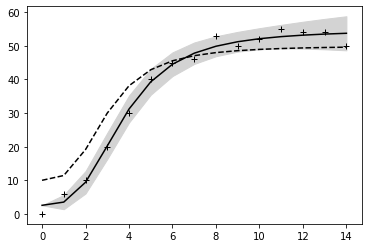

In [16]:
#Gráfico final do metodo lmfit
#Grafico dos valores observados
plt.plot(xobs,yobs,'k+')
#Grafico do modelo
plt.plot(xobs,resultado1.best_fit,'k-')
#Graico com os valores dos parametros iniciais
plt.plot(xobs,resultado1.init_fit,'k--')

#Inserindo o intervalo de confiança do ajuste ic (sigma=desvio padrao)
dp=resultado.eval_uncertainty(sigma=2)
plt.fill_between(xobs,resultado1.best_fit-dp,resultado1.best_fit+dp,color='lightgray')